In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Any, Optional

In [69]:
try:
    df_prefix = pd.read_csv('testing_results.csv', sep=';')
    df_soft = pd.read_csv('soft_testing_results.csv', sep=';')
    print("Dati di training e testing caricati con successo!")
except FileNotFoundError:
    print("Errore.")
    raise

Dati di training e testing caricati con successo!


In [3]:
print("\nDataFrame di prefix:")
print(df_prefix.head())
print("\nDataFrame di soft:")
print(df_soft.head())


DataFrame di prefix:
               Model                Dataset  Token_Length  Learning_Rate  \
0  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00100   
1  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00010   
2  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00001   
3  bert-base-uncased  disi-unibo-nlp/AnatEM            20        0.00100   
4  bert-base-uncased  disi-unibo-nlp/AnatEM            20        0.00010   

   Micro Avg F1-Score  
0              0.8274  
1              0.8097  
2              0.8122  
3              0.8235  
4              0.8107  

DataFrame di soft:
               Model                Dataset  Token_Length  Learning_Rate  \
0  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00100   
1  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00010   
2  bert-base-uncased  disi-unibo-nlp/AnatEM            10        0.00001   
3  bert-base-uncased  disi-unibo-nlp/AnatEM          

In [4]:
df_prefix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               54 non-null     object 
 1   Dataset             54 non-null     object 
 2   Token_Length        54 non-null     int64  
 3   Learning_Rate       54 non-null     float64
 4   Micro Avg F1-Score  54 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [22]:
def plot_f1_score_comparison(
    df: pd.DataFrame, 
    param_col_name: str, 
    filter_params: Dict[str, Any],
    f1_score_col: str = 'Micro Avg F1-Score',
    title: Optional[str] = None
):

    df_plotting = df.copy()
    
    applied_filters = []
    for col, value in filter_params.items():
        if col in df_plotting.columns:
            df_plotting = df_plotting[df_plotting[col] == value]
            applied_filters.append(f'{col.replace("_", " ").title()}={value}')
        else:
            print(f"Attenzione: Colonna di filtro '{col}' non trovata nel DataFrame.")
    
    if df_plotting.empty:
        print("Il DataFrame filtrato è vuoto. Nessun dato da plottare.")
        return

    TEMP_PARAM_COL = 'Trained_Param_Value'
    df_plotting = df_plotting.rename(columns={param_col_name: TEMP_PARAM_COL})

    # Sort
    df_plotting = df_plotting.sort_values(by=['Dataset', 'Model', TEMP_PARAM_COL])

    plt.figure(figsize=(16, 10))

    # Dati
    datasets = df_plotting['Dataset'].unique()
    # Le configurazioni sono uniche solo dopo il filtraggio
    configurations = df_plotting[['Model', TEMP_PARAM_COL]].drop_duplicates().reset_index(drop=True)
    num_configs = len(configurations)
    
    bar_width = 0.8 / num_configs
    x_pos = np.arange(len(datasets))

    # Scelta della colormap
    colors = plt.cm.get_cmap('Paired', num_configs)

    # Barre
    for i, (index, config) in enumerate(configurations.iterrows()):
        model = config['Model']
        param_val = config[TEMP_PARAM_COL]

        subset = df_plotting[
            (df_plotting['Model'] == model) & 
            (df_plotting[TEMP_PARAM_COL] == param_val)
        ]

        heights = []
        for ds in datasets:
            f1_value_series = subset[subset['Dataset'] == ds][f1_score_col]

            if not f1_value_series.empty:
                heights.append(f1_value_series.iloc[0]) 
            else:
                heights.append(0.0)

        position = x_pos + (i - (num_configs - 1) / 2) * bar_width

        legend_label = f'{model} ({param_col_name.replace("_", " ").title()}: {param_val})'

        plt.bar(
            position, 
            heights, 
            bar_width, 
            label=legend_label, 
            color=colors(i)
        )
        
        # Etichette (valore esatto)
        for pos, height in zip(position, heights):
            plt.text(
                pos, 
                height + 0.01, 
                f'{height:.4f}', 
                ha='center', 
                va='bottom', 
                fontsize=9
            )

    # Info grafico
    if title is None:
        filter_str = ', '.join(applied_filters)
        default_title = (
            f'Confronto F1-Score ({f1_score_col.replace("_", " ").title()}) per '
            f'{param_col_name.replace("_", " ").title()} - Filtro: ({filter_str})'
        )
        plt.title(default_title, fontsize=14)
    else:
        plt.title(title, fontsize=16)

    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel(f1_score_col.replace("_", " ").title(), fontsize=12)
    plt.xticks(x_pos, datasets)
    plt.ylim(0, 1.05)
    plt.legend(title='Configurazione Modello/Parametro')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\Franco\AppData\Local\Temp\ipykernel_21524\3031737897.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


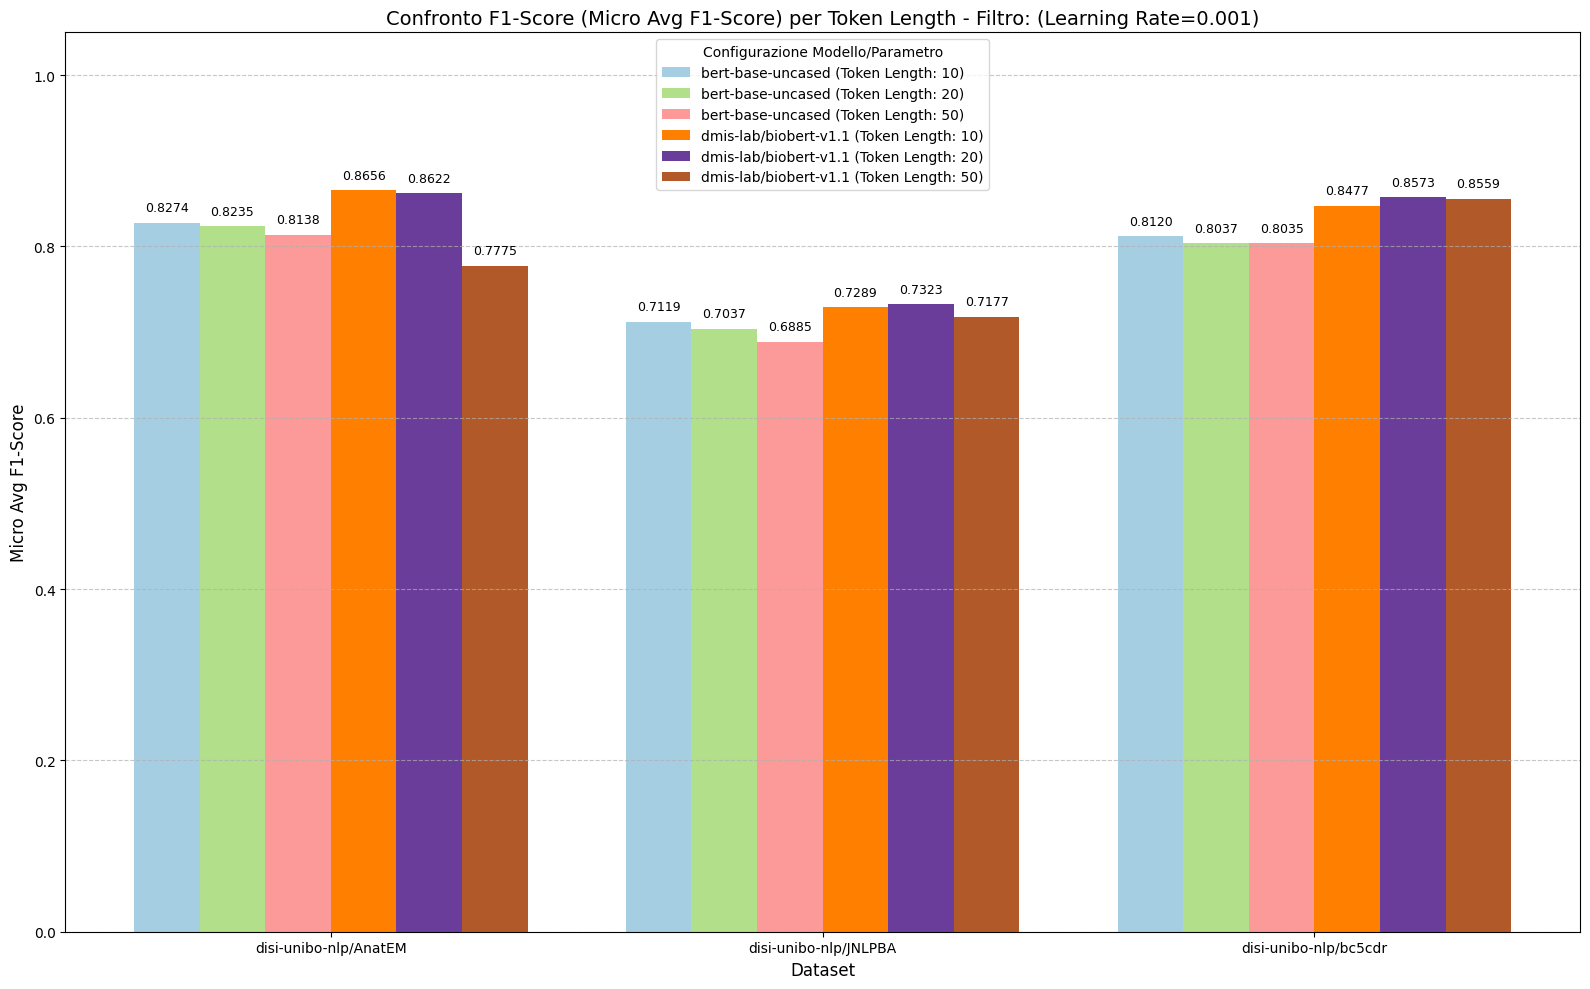

In [23]:
plot_f1_score_comparison(df=df_prefix, param_col_name="Token_Length", filter_params={"Learning_Rate" : 1e-3})

C:\Users\Franco\AppData\Local\Temp\ipykernel_21524\3031737897.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


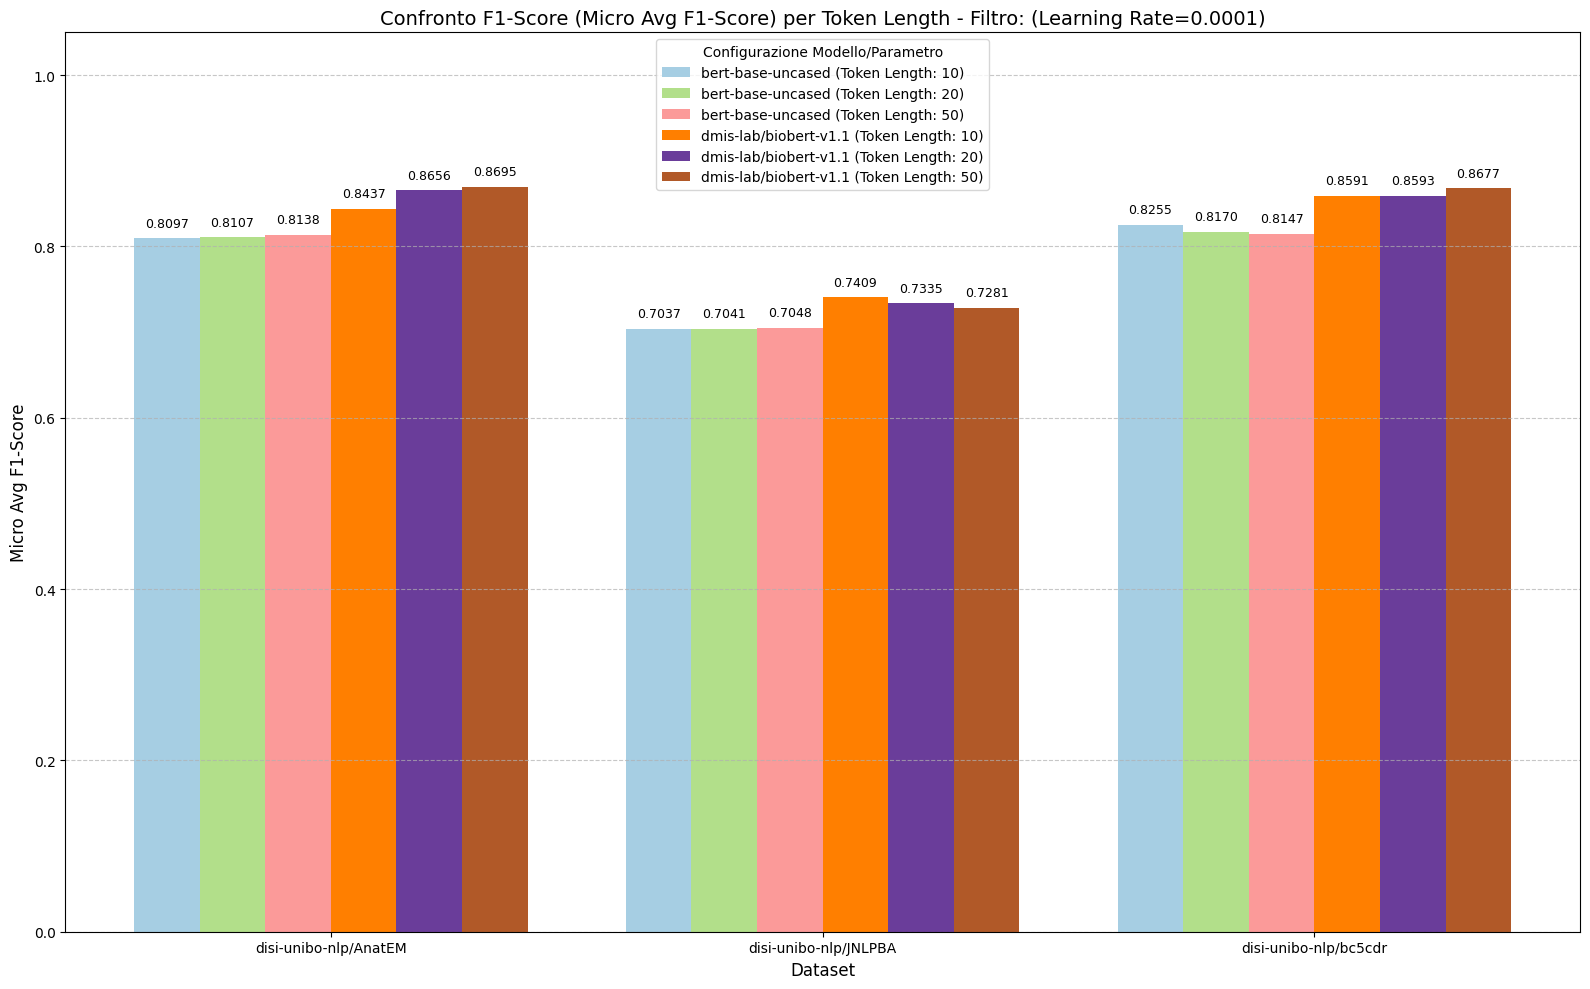

In [24]:
plot_f1_score_comparison(df=df_prefix, param_col_name="Token_Length", filter_params={"Learning_Rate" : 1e-4})

C:\Users\Franco\AppData\Local\Temp\ipykernel_21524\3031737897.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


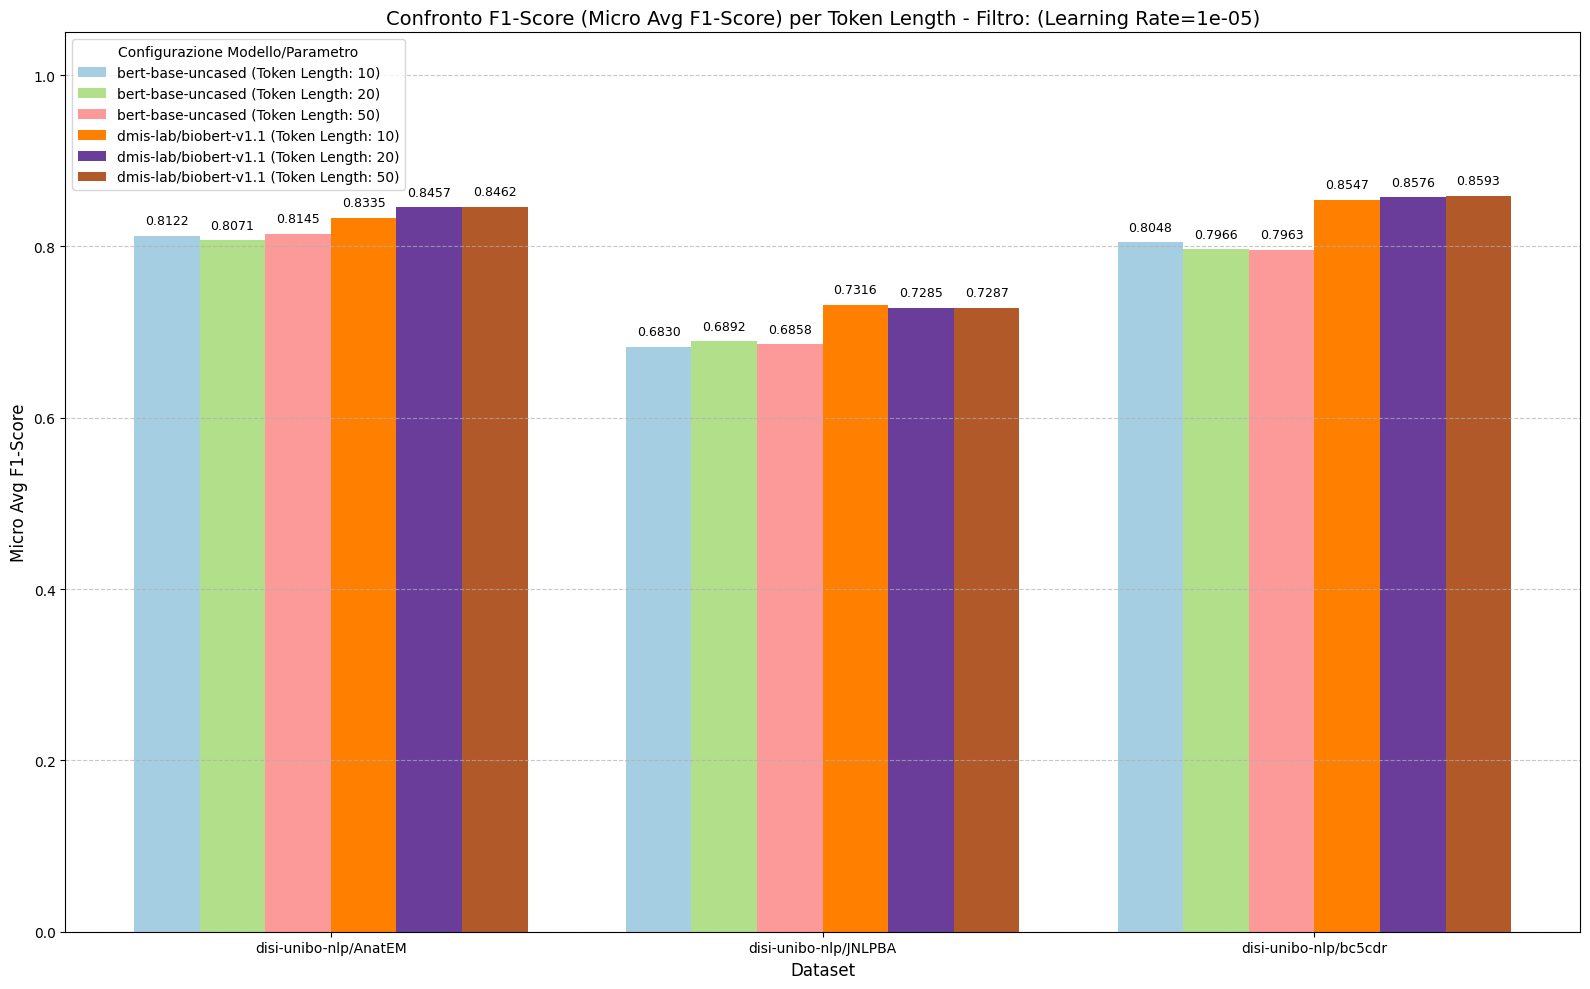

In [25]:
plot_f1_score_comparison(df=df_prefix, param_col_name="Token_Length", filter_params={"Learning_Rate" : 1e-5})

## ClinicalBert ha usato la metà del tempo per ogni epoca per addestrarsi rispetto agli altri modelli

C:\Users\Franco\AppData\Local\Temp\ipykernel_21524\3031737897.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


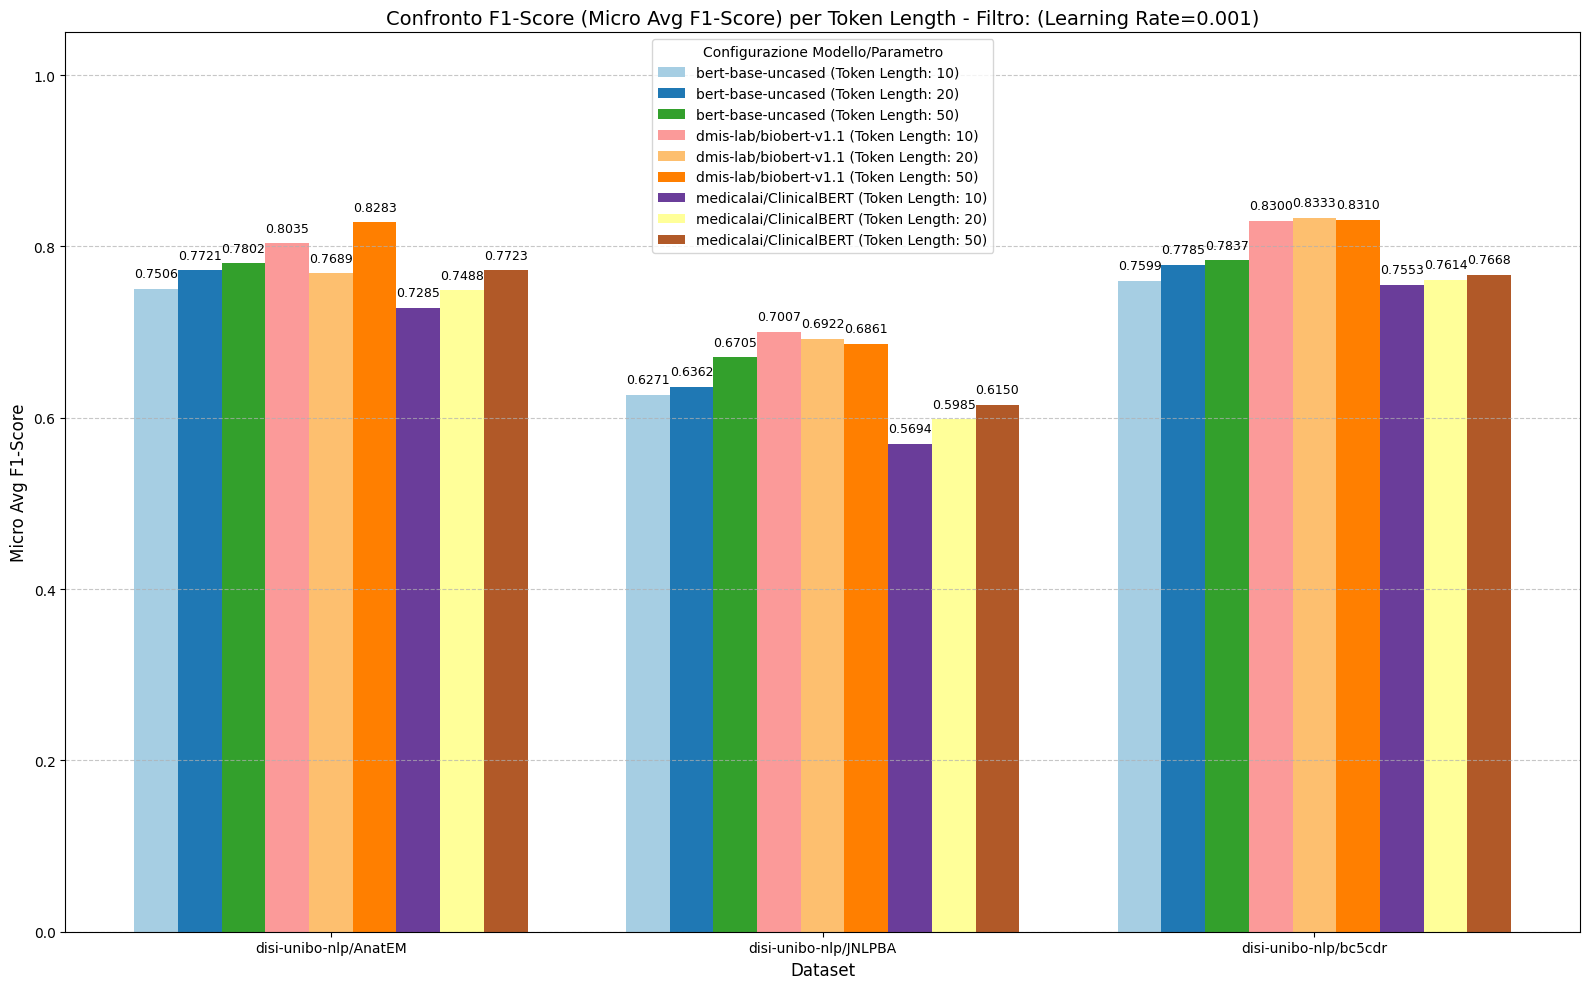

In [26]:
plot_f1_score_comparison(df=df_soft, param_col_name="Token_Length", filter_params={"Learning_Rate" : 1e-3})

C:\Users\Franco\AppData\Local\Temp\ipykernel_21524\3031737897.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


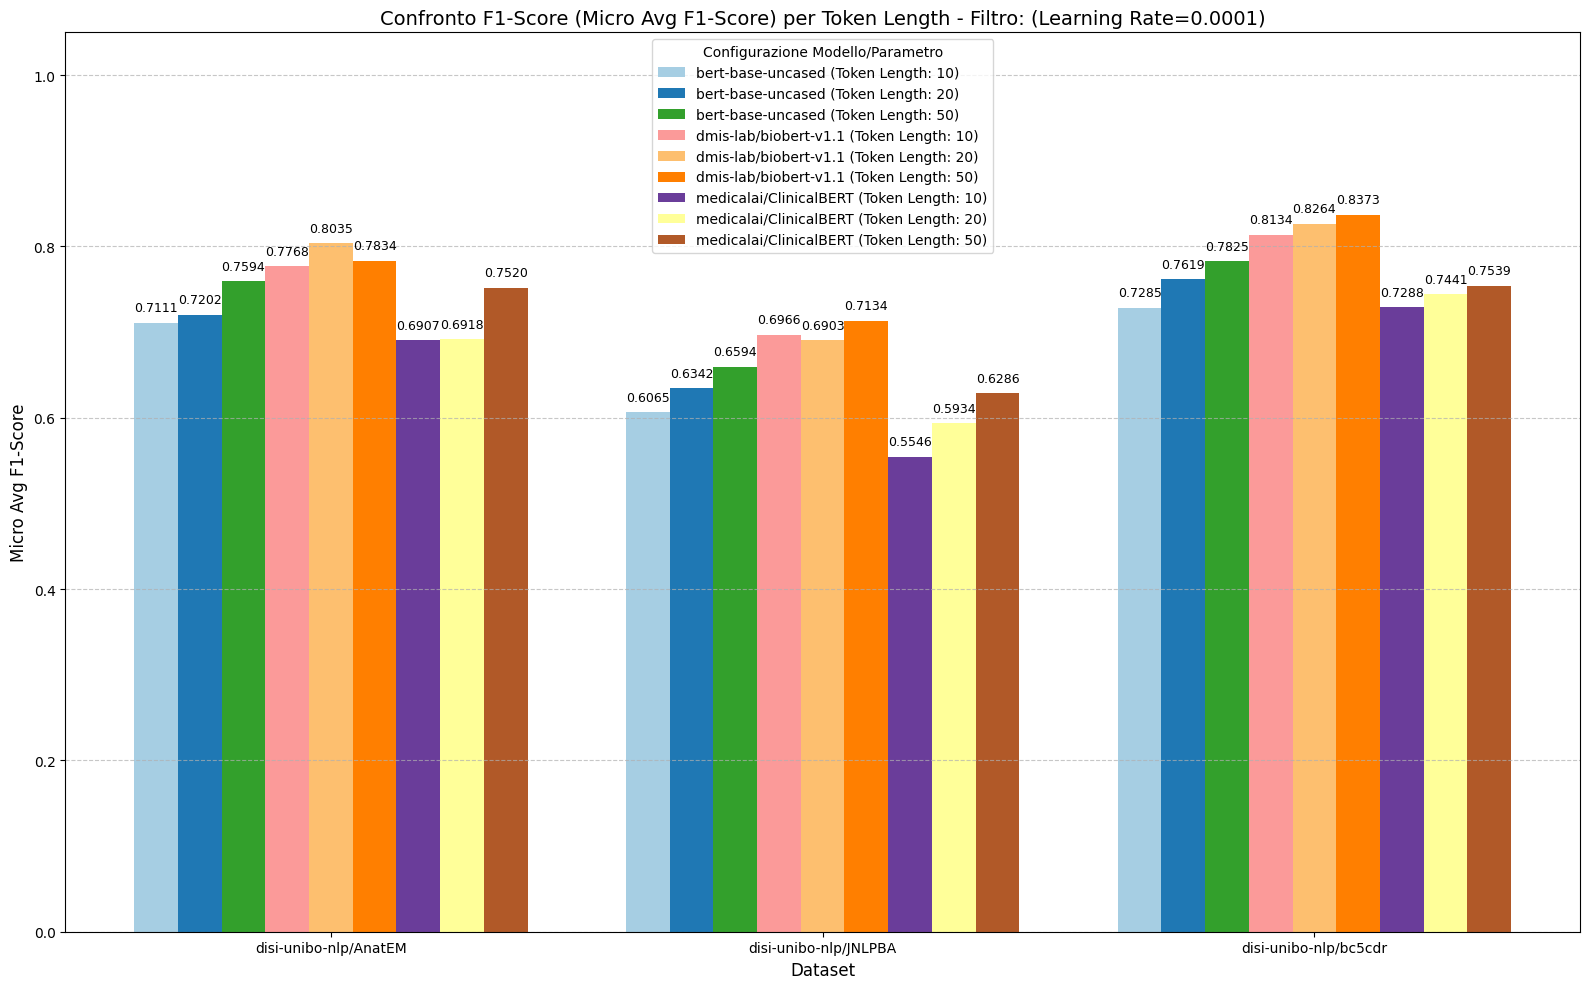

In [27]:
plot_f1_score_comparison(df=df_soft, param_col_name="Token_Length", filter_params={"Learning_Rate" : 1e-4})

C:\Users\Franco\AppData\Local\Temp\ipykernel_21524\3031737897.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


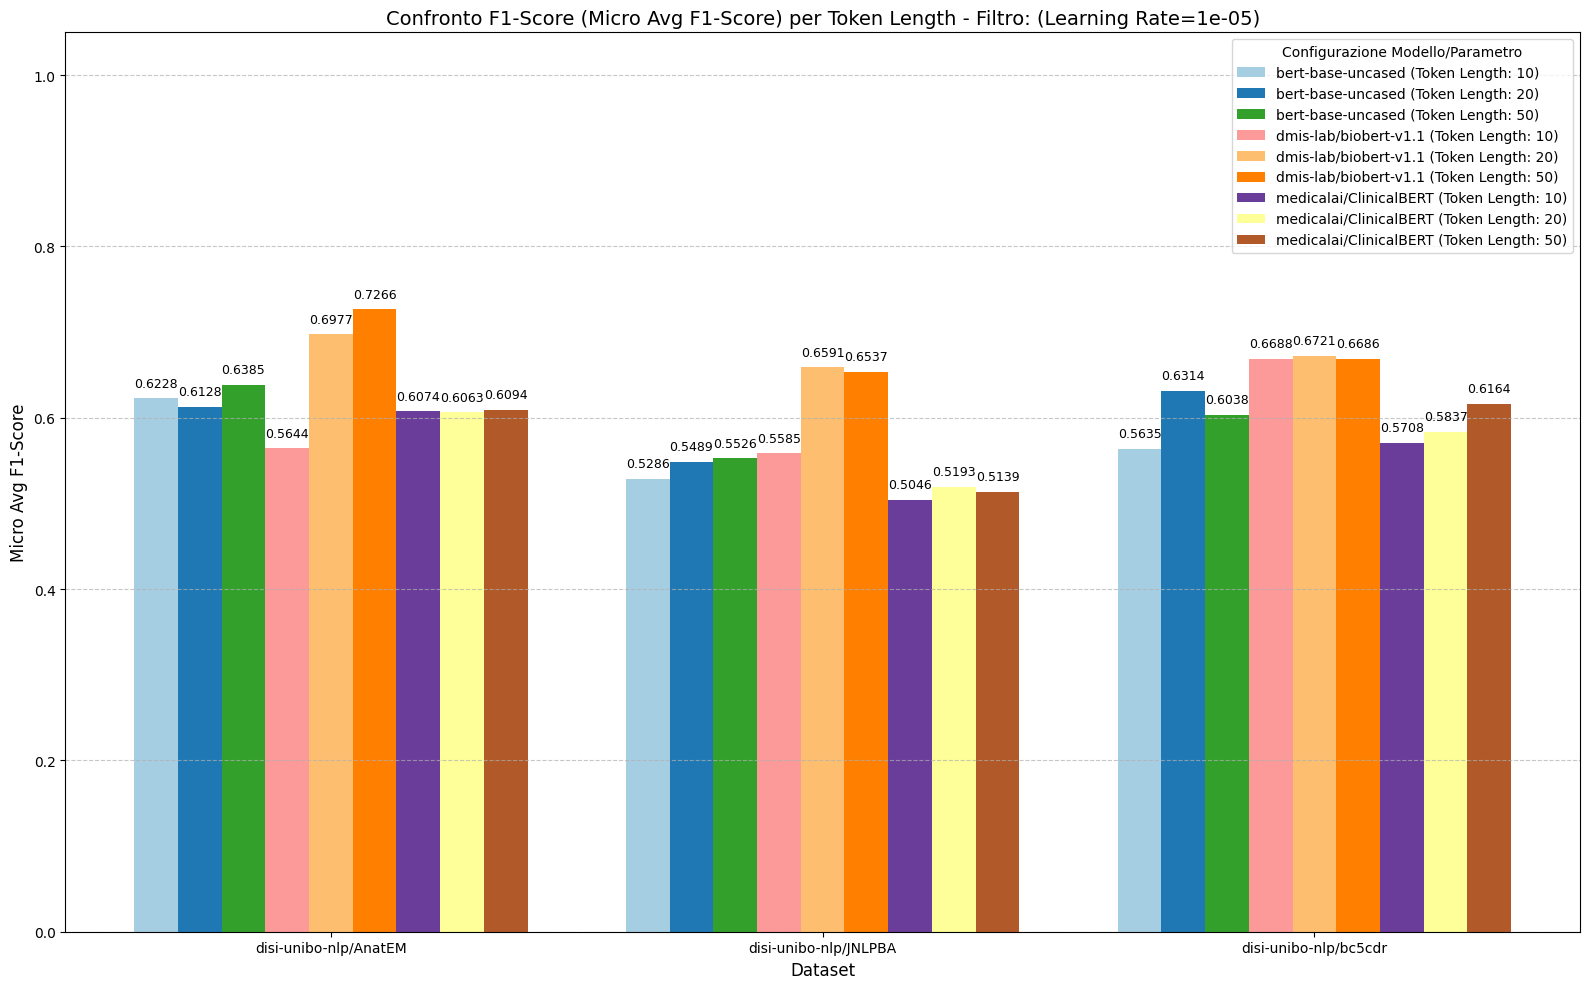

In [70]:
plot_f1_score_comparison(df=df_soft, param_col_name="Token_Length", filter_params={"Learning_Rate" : 1e-5})

In [71]:
df_prefix.head()

,Model,Dataset,Token_Length,Learning_Rate,Micro Avg F1-Score
0,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00100,0.8274
1,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00010,0.8097
2,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00001,0.8122
3,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00100,0.8235
4,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00010,0.8107


In [72]:
df_soft.head()

,Model,Dataset,Token_Length,Learning_Rate,Micro Avg F1-Score
0,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00100,0.7506
1,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00010,0.7111
2,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00001,0.6228
3,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00100,0.7721
4,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00010,0.7202


In [73]:
df = df_prefix
df = df.rename(columns={"Micro Avg F1-Score" : "Prefix Micro Avg F1-Score"})
temp = df_soft
temp[~temp['Model'].str.contains('medicalai/ClinicalBERT', case=False, na=False)]
temp = temp.rename(columns={"Micro Avg F1-Score" : "Soft Micro Avg F1-Score"})

df = pd.merge(df, temp, on=['Model', 'Dataset', 'Token_Length', 'Learning_Rate'])
df

,Model,Dataset,Token_Length,Learning_Rate,Prefix Micro Avg F1-Score,Soft Micro Avg F1-Score
0,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00100,0.8274,0.7506
1,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00010,0.8097,0.7111
2,bert-base-uncased,disi-unibo-nlp/AnatEM,10,0.00001,0.8122,0.6228
3,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00100,0.8235,0.7721
4,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00010,0.8107,0.7202
5,bert-base-uncased,disi-unibo-nlp/AnatEM,20,0.00001,0.8071,0.6128
6,bert-base-uncased,disi-unibo-nlp/AnatEM,50,0.00100,0.8138,0.7802
7,bert-base-uncased,disi-unibo-nlp/AnatEM,50,0.00010,0.8138,0.7594
8,bert-base-uncased,disi-unibo-nlp/AnatEM,50,0.00001,0.8145,0.6385
9,bert-base-uncased,disi-unibo-nlp/JNLPBA,10,0.00100,0.7119,0.6271


In [ ]:
# Risultato migliore per dataset, prefix
prefix = df_prefix.groupby("Dataset")['Micro Avg F1-Score'].idxmax()
df_prefix.iloc[prefix]

,Model,Dataset,Token_Length,Learning_Rate,Micro Avg F1-Score
34,dmis-lab/biobert-v1.1,disi-unibo-nlp/AnatEM,50,0.0001,0.8695
37,dmis-lab/biobert-v1.1,disi-unibo-nlp/JNLPBA,10,0.0001,0.7409
52,dmis-lab/biobert-v1.1,disi-unibo-nlp/bc5cdr,50,0.0001,0.8677


In [ ]:
# Risultato migliore per dataset, soft
soft = df_soft.groupby("Dataset")['Micro Avg F1-Score'].idxmax()
df_soft.iloc[soft]

,Model,Dataset,Token_Length,Learning_Rate,Micro Avg F1-Score
33,dmis-lab/biobert-v1.1,disi-unibo-nlp/AnatEM,50,0.0010,0.8283
43,dmis-lab/biobert-v1.1,disi-unibo-nlp/JNLPBA,50,0.0001,0.7134
52,dmis-lab/biobert-v1.1,disi-unibo-nlp/bc5cdr,50,0.0001,0.8373


In [84]:
all = df.groupby("Dataset")['Prefix Micro Avg F1-Score'].idxmax()
df.iloc[all]

,Model,Dataset,Token_Length,Learning_Rate,Prefix Micro Avg F1-Score,Soft Micro Avg F1-Score
34,dmis-lab/biobert-v1.1,disi-unibo-nlp/AnatEM,50,0.0001,0.8695,0.7834
37,dmis-lab/biobert-v1.1,disi-unibo-nlp/JNLPBA,10,0.0001,0.7409,0.6966
52,dmis-lab/biobert-v1.1,disi-unibo-nlp/bc5cdr,50,0.0001,0.8677,0.8373


In [85]:
all = df.groupby("Dataset")['Soft Micro Avg F1-Score'].idxmax()
df.iloc[all]

,Model,Dataset,Token_Length,Learning_Rate,Prefix Micro Avg F1-Score,Soft Micro Avg F1-Score
33,dmis-lab/biobert-v1.1,disi-unibo-nlp/AnatEM,50,0.0010,0.7775,0.8283
43,dmis-lab/biobert-v1.1,disi-unibo-nlp/JNLPBA,50,0.0001,0.7281,0.7134
52,dmis-lab/biobert-v1.1,disi-unibo-nlp/bc5cdr,50,0.0001,0.8677,0.8373
